In [0]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 92kB/s 
     |████████████████████████████████| 4.3MB 43.3MB/s 
     |████████████████████████████████| 501kB 54.3MB/s 


In [0]:
!pip install mlxtend==0.17.0

     |████████████████████████████████| 1.3MB 3.4MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
print(tf.__version__)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rn

2.0.0-rc0


In [0]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [0]:
import os
os.environ['PYTHONHASHSEED'] = '0'


In [0]:
np.random.seed(37)
rn.seed(1254)

In [0]:
!git clone https://github.com/MohnishJain/MoviePosterDataset-.git

Cloning into 'Movies-Poster_Dataset'...
remote: Enumerating objects: 7873, done.
remote: Counting objects: 100% (7873/7873), done.
remote: Compressing objects: 100% (7873/7873), done.
remote: Total 7873 (delta 1), reused 7872 (delta 0), pack-reused 0
Receiving objects: 100% (7873/7873), 246.59 MiB | 52.89 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (7871/7871), done.


In [0]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CNN/MultiLabelImageClassification/train.csv')
data.shape

(7254, 27)

In [0]:
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
img_width = 350
img_height = 350

X = []

for i in tqdm(range(data.shape[0])):
  path = '/content/Movies-Poster_Dataset/Images/' + data['Id'][i] + '.jpg'
  img = image.load_img(path, target_size=(img_width, img_height, 3))
  img = image.img_to_array(img)
  img = img/255.0
  X.append(img)

X = np.array(X)

100%|██████████| 7254/7254 [00:24<00:00, 297.12it/s]


In [0]:
X.shape,X[0].shape


((7254, 350, 350, 3), (350, 350, 3))

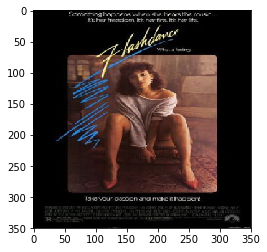

In [0]:
plt.imshow(X[1])

In [0]:
data['Genre'][1]

"['Drama', 'Romance', 'Music']"

In [0]:
y = data.drop(['Id' , 'Genre'] , axis = 1 )
y = y.to_numpy()
y.shape

(7254, 25)

In [0]:
X_train , X_test , y_train , y_test = train_test_split(X , y, random_state = 0 , test_size = 0.15)

In [0]:
X_train[0].shape

(350, 350, 3)

#CNN

In [0]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(25, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization_6 (Batch (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 174, 174, 16)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_7 (Batch (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 86, 86, 32)       

In [0]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Train on 6165 samples, validate on 1089 samples
Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
6165/6165 [==============================] - 208s 34ms/sample - loss: 0.6992 - accuracy: 0.6408 - val_loss: 0.4933 - val_accuracy: 0.8342
Epoch 2/5
6165/6165 [==============================] - 220s 36ms/sample - loss: 0.3126 - accuracy: 0.8906 - val_loss: 0.3213 - val_accuracy: 0.9081
Epoch 3/5
6165/6165 [==============================] - 217s 35ms/sample - loss: 0.2629 - accuracy: 0.9066 - val_loss: 0.4749 - val_accuracy: 0.8807
Epoch 4/5
6165/6165 [==============================] - 219s 35ms/sample - loss: 0.2523 - accuracy: 0.9088 - val_loss: 0.3412 - val_accuracy: 0.9004
Epoch 5/5
6165/6165 [==============================] - 217s 35ms/sample - loss: 0.2454 - accuracy: 0.9121 - val_loss: 0.3636 - val_accuracy: 0.8990


In [0]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

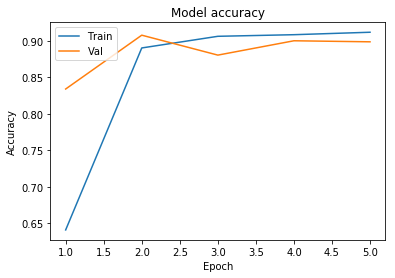

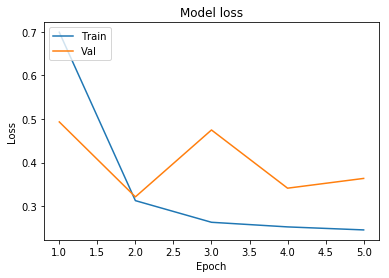

In [0]:
plot_learningCurve(history, len(history.epoch))

#Testing the Model

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')
Adventure
Drama
Comedy


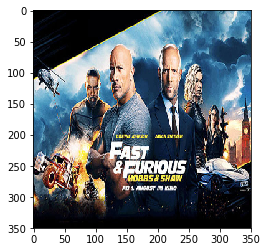

In [0]:
img = image.load_img('/content/sample_data/fast.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = data.columns[2:]
print(classes)
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[-3:]
top3


for i in range(3):
  print(classes[top3[i]])

In [0]:
y_prob[0]

array([0.22070703, 0.27085328, 0.05135018, 0.06087753, 0.3197732 ,
       0.05714649, 0.11765113, 0.26422316, 0.12534922, 0.08377096,
       0.03653467, 0.09657851, 0.03575534, 0.00784782, 0.03714961,
       0.00241002, 0.00375158, 0.00193736, 0.09916243, 0.09087577,
       0.00475818, 0.02610636, 0.16199684, 0.00696272, 0.00550859],
      dtype=float32)